# Day 4 - Bad map

Data for both the polygons and tile grid map layout from the London Datastore
    
- [Shapefiles](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
- [London squares cartogram map](https://data.london.gov.uk/dataset/excel-mapping-template-for-london-boroughs-and-wards)

## Setup

In [15]:
import os
import configparser

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [19]:
# set custom fonts
plt.rcParams['font.family'] = ['Inter']
from matplotlib import font_manager
title_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\Inconsolata-Semibold.ttf')

In [2]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
config_file =  os.path.join(root, 'config.cfg')

# geodata for shapefiles
config = configparser.ConfigParser()
config.read(config_file)
gdata_root = config['geodata']['path']

## Load data

In [7]:
## Load shapefile
gdf = gpd.read_file(os.path.join(gdata_root, 'london-shapefiles\\London_Borough_Excluding_MHW.shp'))

In [6]:
display_dict = {'E09000007': 'CMD', 'E09000001': 'CTY', 'E09000012': 'HCK', 'E09000013': 'HMS', 'E09000014': 'HGY',
             'E09000019': 'ISL', 'E09000020': 'KNS', 'E09000022': 'LAM', 'E09000023': 'LSH', 'E09000025': 'NWM',
             'E09000028': 'SWR', 'E09000030': 'TOW', 'E09000032': 'WNS', 'E09000033': 'WST', 'E09000002': 'BAR',
             'E09000003': 'BRN', 'E09000004': 'BXL',  'E09000005': 'BRT',  'E09000006': 'BRM',  'E09000008': 'CRD',
             'E09000009': 'ELG',  'E09000010': 'ENF',  'E09000011': 'GRN',  'E09000015': 'HRW',  'E09000016': 'HVG',
             'E09000017': 'HDN',  'E09000018': 'HNS',  'E09000021': 'KNG',  'E09000024': 'MRT',  'E09000026': 'RDB',
             'E09000027': 'RCH',  'E09000029': 'STN',  'E09000031': 'WTH'}

# map display name to gdf
gdf["display_name"] = gdf["GSS_CODE"].map(display_dict)

## Visualise

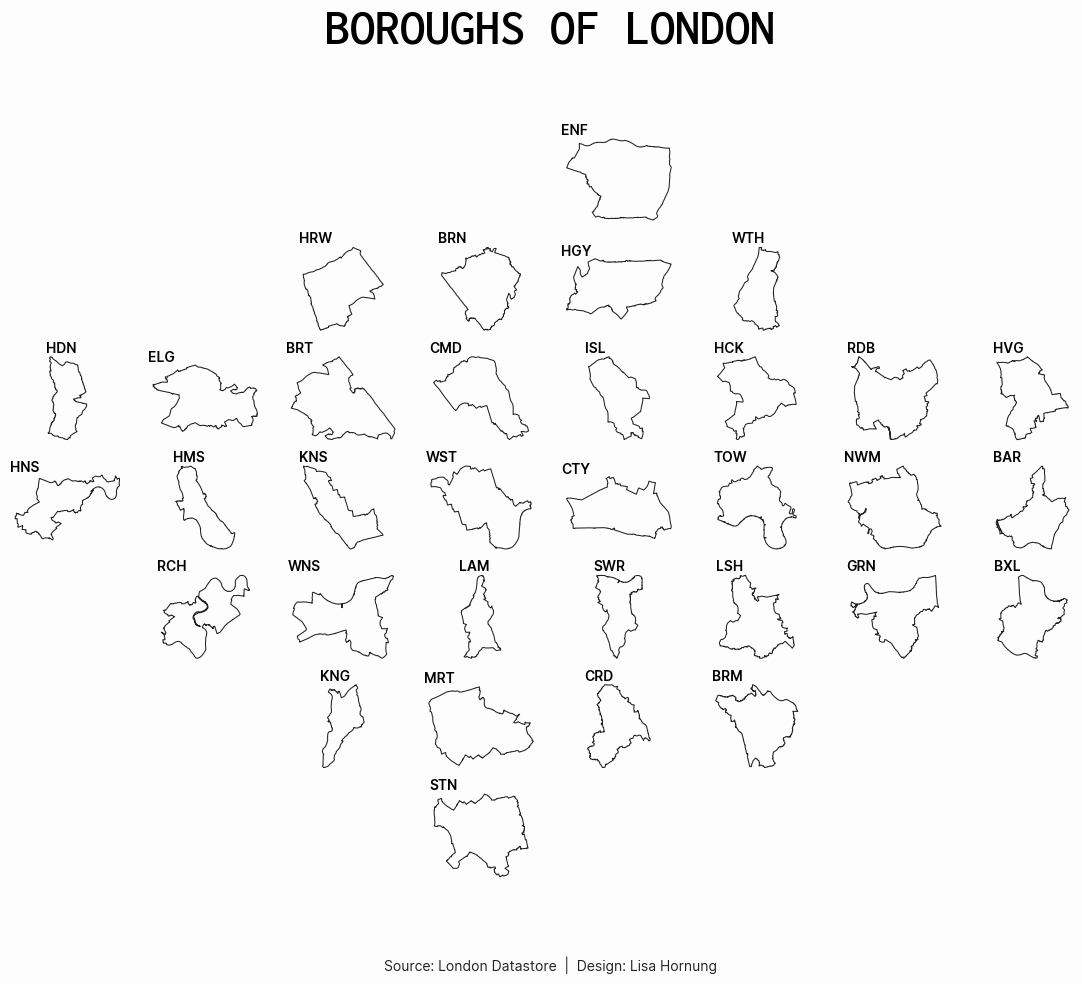

In [29]:
bg = '#FDFDFD'

# layout ------------------
layout = [
            ["___","___","___","___","ENF","___","___","___"],
            ["___","___","HRW","BRN","HGY","WTH","___","___"],
            ["HDN","ELG","BRT","CMD","ISL","HCK","RDB","HVG"],
            ["HNS","HMS","KNS","WST","CTY","TOW","NWM","BAR"],
            ["___","RCH","WNS","LAM","SWR","LSH","GRN","BXL"],
            ["___","___","KNG","MRT","CRD","BRM","___","___"],
            ["___","___","___","STN","___","___","___","___"],
            ]
fig,axs = plt.subplot_mosaic(layout, figsize=(12,9), empty_sentinel="___") 
plt.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(bg)

# plot -----------------------
for ax in axs:
    # plot each polygon in the right place
    data = gdf[gdf["display_name"]==ax]
    data.plot(ax=axs[ax], color="None", edgecolor="#222222", linewidth=0.75)

    # plot borough name
    trans = transforms.blended_transform_factory(axs[ax].transAxes, axs[ax].transAxes)
    axs[ax].text(0,1,ax, transform=trans, fontweight="semibold")

    axs[ax].axis("off")

# title + footer ------------------
plt.figtext(0.5, 0.98 , 'Boroughs of London'.upper(), fontproperties=title_font, fontsize=36,  ha='center')
plt.figtext(0.5, -0.05, 'Source: London Datastore  |  Design: Lisa Hornung', fontsize=10, ha='center', color='#222222')

# export
plt.savefig('london-boroughs-tilegrid-polygons.png', facecolor=bg, dpi=120, bbox_inches='tight',pad_inches=1)

plt.show()